ANALISIS UNIVARIADO


MANUEL ALBERTO GONZALEZ GONZALEZ

In [2]:
#mportando primero las bibliotecas requeridas y el conjunto de datos.
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Tipos de datos de las variables de datos

In [3]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


Importamos las Librerias necesarias

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explicar por qué la variable seleccionada es relevante dentro del conjunto de datos y como podría influir en el análisis o toma de decisiones.

**variable 'Age'**

La variable 'Age' representa la edad del pasajero. Es relevante porque los niños y los ancianos pueden haber sido tratados de manera diferente durante el proceso de evacuación.

**variable 'Fare'**

La variable 'Fare' representa el precio del pasaje.  Puede estar relacionada con la clase del pasaje y potencialmente con la calidad del alojamiento, influyendo en la ubicación del pasajero y su acceso a los botes salvavidas.

**variable 'Pclass'**

La variable 'Pclass' representa la clase de pasaje del pasajero (1ª, 2ª o 3ª). Es relevante porque la clase de pasaje estaba relacionada con la ubicación en el barco, el acceso a botes salvavidas y, por lo tanto, la probabilidad de supervivencia.

**variable 'Sex'**

La variable 'Sex' indica el sexo del pasajero. Es relevante porque históricamente, las mujeres y los niños tenían prioridad en los botes salvavidas, lo que podría haber afectado significativamente su tasa de supervivencia.


#**Generar estadísticas descriptivas (media, mediana, moda, desviación estándar, valores atípicos, etc.).**

##**Estadísticas descriptivas para variables numéricas**

### Age

In [5]:
print(f"\nEstadísticas descriptivas para Age:")
print(df['Age'].describe())
print(f"Mediana: {df['Age'].median()}")
print(f"Moda: {df['Age'].mode()[0]}")



Estadísticas descriptivas para Age:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Mediana: 28.0
Moda: 24.0


# Detectar valores atípicos para **Age** usando IQR

In [7]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"Valores atípicos ({'Age'}): \n{outliers['Age']}")


Valores atípicos (Age): 
33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


### Fare

In [8]:
print(f"\nEstadísticas descriptivas para Fare:")
print(df['Fare'].describe())
print(f"Mediana: {df['Fare'].median()}")
print(f"Moda: {df['Fare'].mode()[0]}")


Estadísticas descriptivas para Fare:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
Mediana: 14.4542
Moda: 8.05


### Detectar valores atípicos en **Fare** usando IQR

In [9]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(f"Valores atípicos ({'Fare'}): \n{outliers['Fare']}")

Valores atípicos (Fare): 
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64


## **Estadísticas descriptivas para variables categóricas**

In [10]:
categorical_vars = ['Pclass', 'Sex']
for var in categorical_vars:
    print(f"\nEstadísticas descriptivas para '{var}':")
    print(df[var].value_counts())
    print(f"Moda: {df[var].mode()[0]}")


Estadísticas descriptivas para 'Pclass':
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Moda: 3

Estadísticas descriptivas para 'Sex':
Sex
male      577
female    314
Name: count, dtype: int64
Moda: male


# Diagrama de Dispersión Univariada (Age)

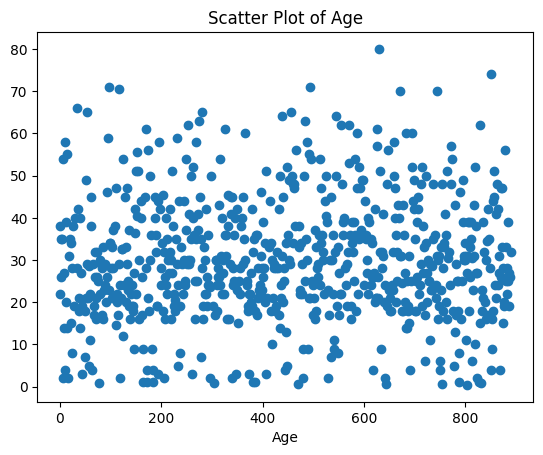

In [11]:
plt.scatter(df.index,df['Age'])
plt.xlabel('Age')
plt.title('Scatter Plot of Age')
plt.show()

# Diagrama de Dispersión Univariada (Fare)

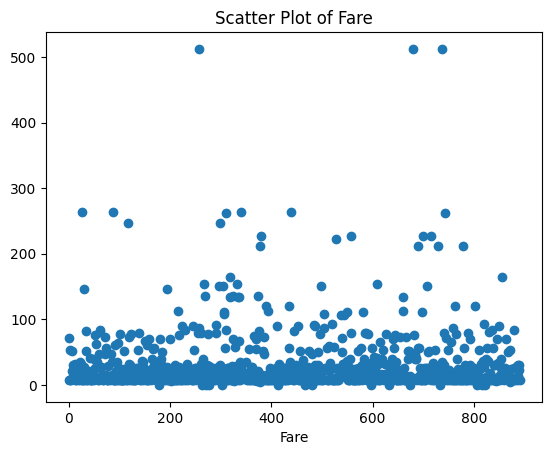

In [12]:
plt.scatter(df.index,df['Fare'])
plt.xlabel('Fare')
plt.title('Scatter Plot of Fare')
plt.show()

# Diagrama de Dispersión Univariada (Pclass)

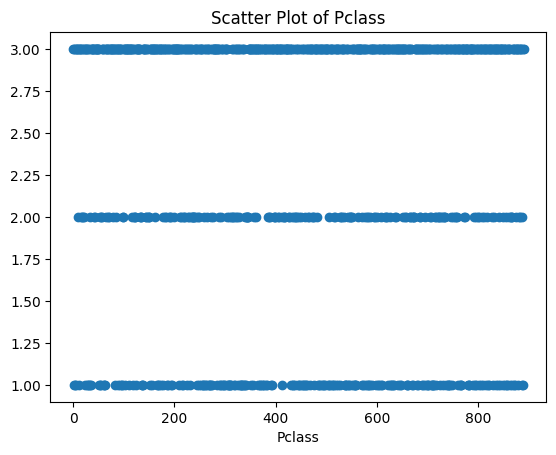

In [13]:
plt.scatter(df.index,df['Pclass'])
plt.xlabel('Pclass')
plt.title('Scatter Plot of Pclass')
plt.show()

# Diagrama de Dispersión Univariada (Sex)

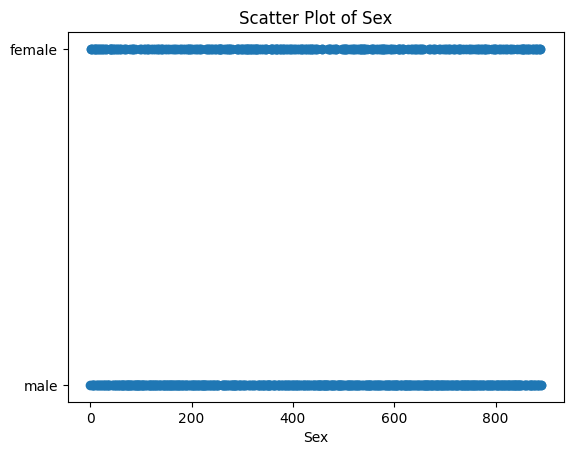

In [14]:
plt.scatter(df.index,df['Sex'])
plt.xlabel('Sex')
plt.title('Scatter Plot of Sex')
plt.show()

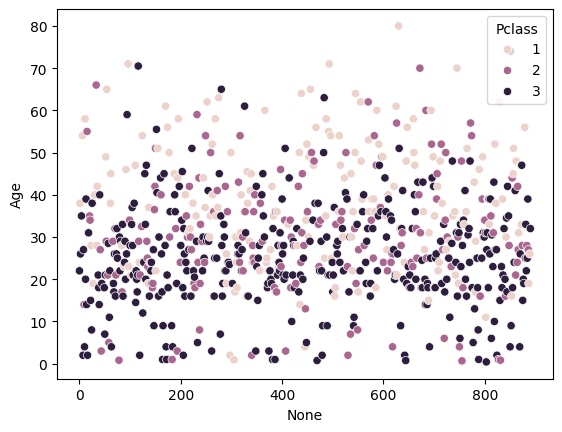

In [15]:
sns.scatterplot(x=df.index, y=df['Age'], hue=df['Pclass'])
plt.show()

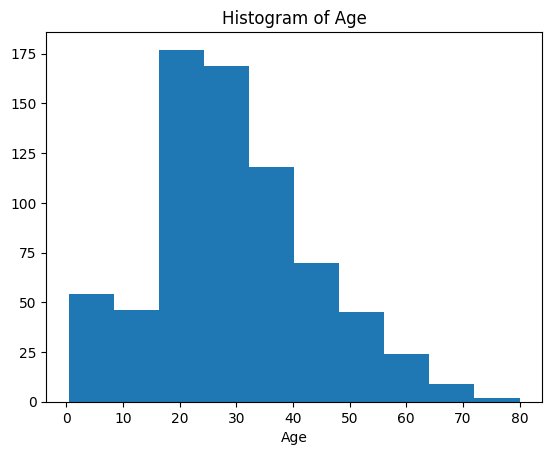

In [ ]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.title('Histogram of Age')
plt.show()

Según el Histograma anterior de la variable Age, los pasajeros su mayor porcentaje se encontraban entre las edades de 18 y 40 años

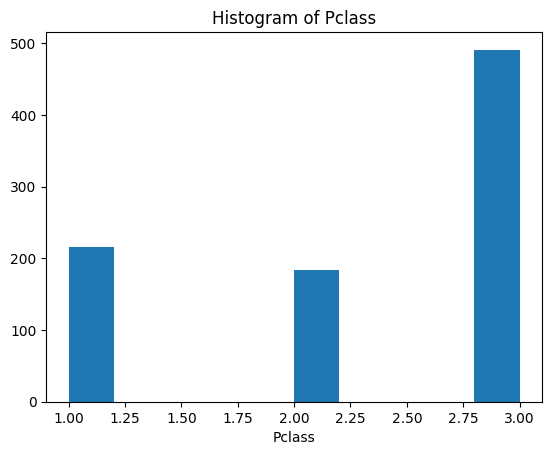

In [ ]:
plt.hist(df['Pclass'])
plt.xlabel('Pclass')
plt.title('Histogram of Pclass')
plt.show()

Según el Histograma anterior de la variable Pclass, los pasajeros en su mayoría se encontraban en la clase C.

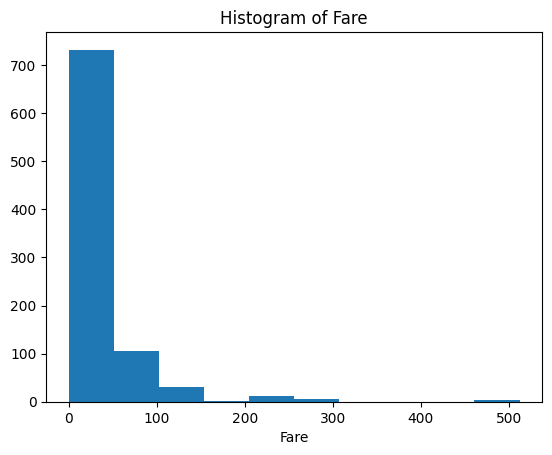

In [ ]:
plt.hist(df['Fare'])
plt.xlabel('Fare')
plt.title('Histogram of Fare')
plt.show()

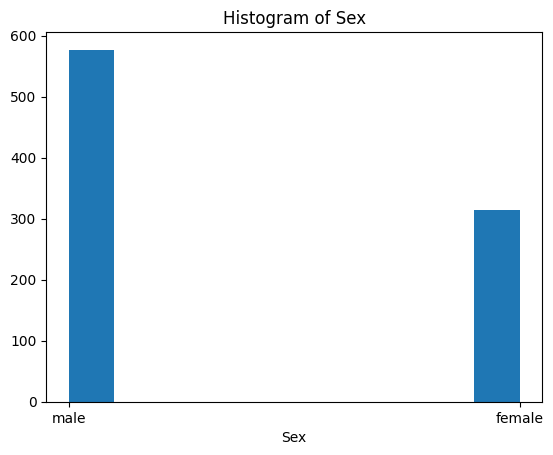

In [18]:
plt.hist(df['Sex'])
plt.xlabel('Sex')
plt.title('Histogram of Sex')
plt.show()

Según el gráfico anterior podemos darnos cuenta que hay un mayor porcentaje de hombres que de mujeres

# Visualización de la distribución de la edad

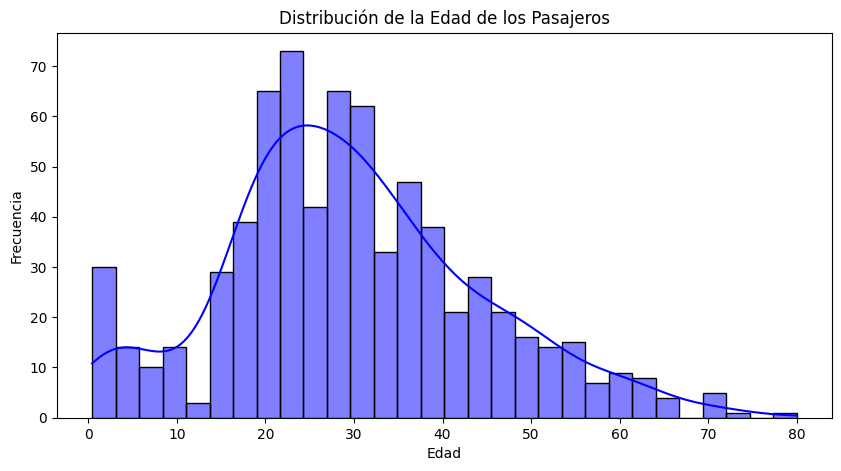

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Distribución de la Edad de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de la variable Fare

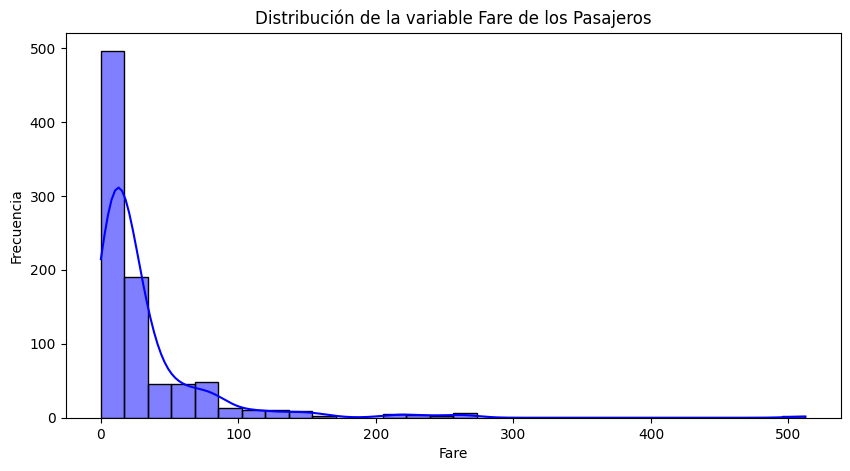

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df['Fare'], bins=30, kde=True, color='blue')
plt.title('Distribución de la variable Fare de los Pasajeros')
plt.xlabel('Fare')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de la variable Pclass

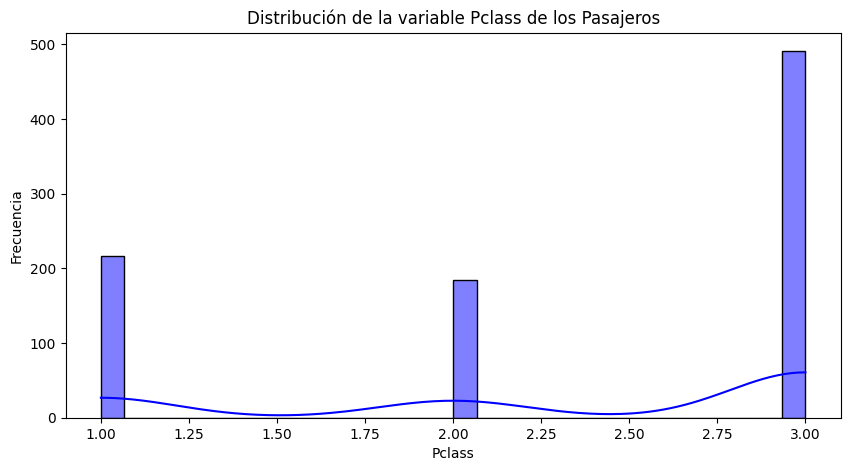

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df['Pclass'], bins=30, kde=True, color='blue')
plt.title('Distribución de la variable Pclass de los Pasajeros')
plt.xlabel('Pclass')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para detectar outliers

##Age

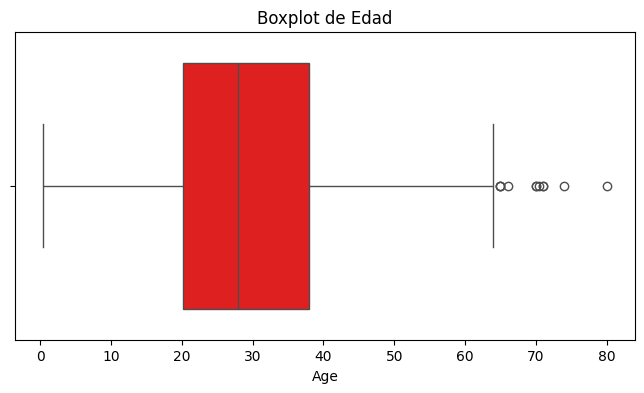

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Age'], color='red')
plt.title('Boxplot de Edad')
plt.show()

## Fare

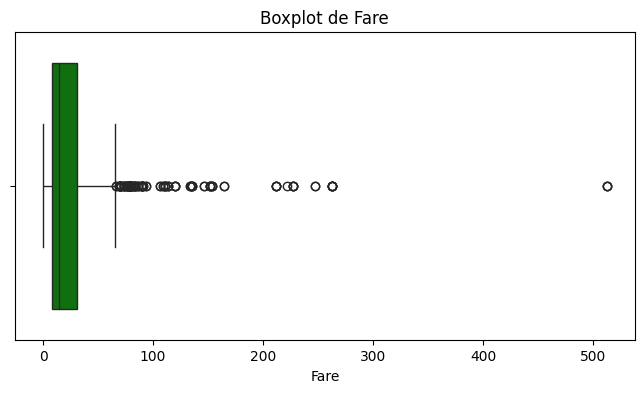

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Fare'], color='green')
plt.title('Boxplot de Fare')
plt.show()

## Pclass

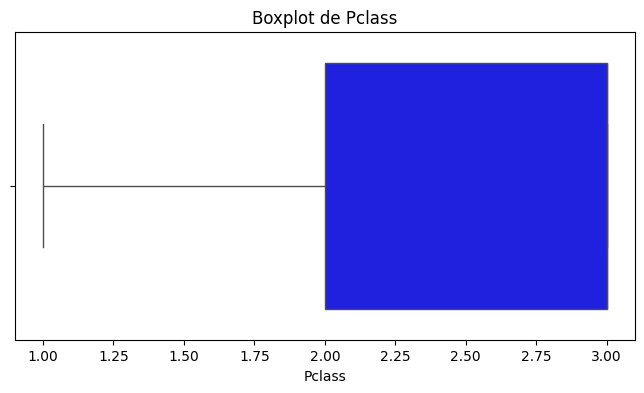

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Pclass'], color='blue')
plt.title('Boxplot de Pclass')
plt.show()

**##CONCLUSIONES**

    La edad promedio de los pasajeros es de aproximadamente 29.7 años.

    La distribución de la edad tiene un sesgo hacia los valores más jóvenes entre 18 y 40 años.
    
    Existen algunos valores atípicos en pasajeros mayores de 65 años.

    La variable 'Age' puede ser útil para segmentar a los pasajeros y analizar la tasa de supervivencia por grupo de edad.

    La variable 'Age' presenta datos faltantes que deben ser tratados antes de un análisis más profundo.

    Lavariable Pclass la mayoría de los pasajeros se encuentran en la clase C
    
    Mos podemos dar cuenta que hay un mayor porcentaje de pasajeros hombres que de mujres

    Existen valores atípicos que pueden influir en modelos predictivos y deben ser considerados.

    Se recomienda segmentar los pasajeros en grupos etarios para entender mejor su comportamiento n el Titanic.